<a href="https://colab.research.google.com/github/elchaima1234/Image-Watermarking-Technique-Using-Convolutional-Autoencoder/blob/main/Image_Watermarking_Using_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Dependencies and Setup**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow import keras

from sklearn.metrics import accuracy_score, precision_score, recall_score

import pathlib
import cv2
import PIL

from math import log10, sqrt
from random import sample

#**Load Data**

In [ ]:
data_dir = pathlib.Path('/content/drive/MyDrive/PFE_final_100/last_test_100_image/100')

images=list(data_dir.glob('*.jpg'))# load all images in the folders to the variable images
images1=images

#**Preprocessing Data**

In [ ]:
X = []
for image in images1:
    img=cv2.imread(str(image))# to read an rgb image and store the matrix in img (cv2 is a module in opencv)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized_img = cv2.resize(img,(192,192),interpolation=cv2.INTER_CUBIC)# because machine learning expect all data have the same shape
    X.append(resized_img)
len(X)

100

#**Splitting Data**

In [ ]:
X = np.array(X)# creat an np.array from X list
#all images are storage in an X np.array so we will divde our database in 75% of training image and 25% for testing
#len(x)---->100% and len(img_train)----->75% ==> len(img_train)= 75% * len(X) / 100%
img_train=X[:round(75*len(X)/100),:,:,:]
#25% of the last images will be taken as testing data (25%)
img_test=X[len(img_train):,:,:,:]
# img_test & img_train  tow np.array with diffrent image
# img_test & img_train  tow np.array with diffrent image

# **Scalling Data**

In [ ]:
#x_train=tf.convert_to_tensor(np.array(x_train)/255, dtype='float32')
#y_train=tf.convert_to_tensor(np.array(y_train)/255, dtype='float32')
x_train=X
y_train=img_wm

x_train = x_train.astype('float32') / 255.# data scaling
y_train = y_train.astype('float32') / 255.

In [ ]:
x_train.shape

(100, 192, 192, 3)

#**Data Visualisation**

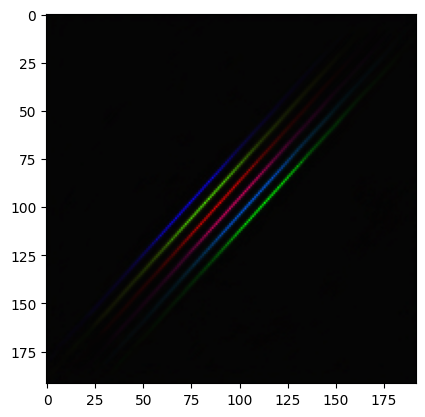

In [ ]:
# importe the watermarked image
img1=cv2.imread('/content/drive/MyDrive/PFE_final_100/results_100/image01/12_wte.png')
img2=cv2.resize(img1,(192,192))
#convert it ton an np.array
img_wm=np.array([img2])
plt.imshow(img_wm[0])

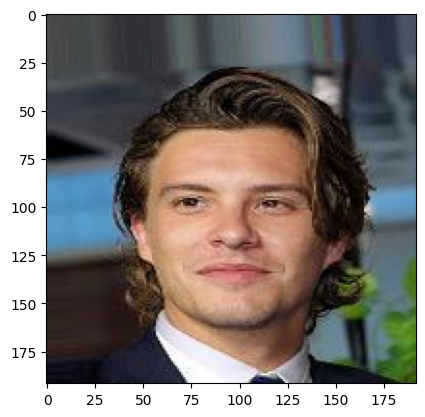

In [ ]:
plt.imshow(x_train[25])

# **Build The Model**

**The Encoder**

In [ ]:
####################### encoder #####################

encoder_input= keras.Input(shape=(192, 192, 3),name='encoder')

y= layers.Conv2D(128, kernel_size=5, strides=1, activation='relu', padding='same')(encoder_input)
y = layers.AveragePooling2D(2)(y)
y= layers.Conv2D(128, kernel_size=5, strides=1, activation='relu', padding='same')(y)
y = layers.AveragePooling2D(2)(y)
y= layers.Conv2D(128, kernel_size=5, strides=1, activation='relu', padding='same')(y)
y = layers.AveragePooling2D(2)(y)
y= layers.Conv2D(128, kernel_size=5, strides=1, activation='relu', padding='same')(y)
y = layers.AveragePooling2D(2)(y)
y= layers.Conv2D(128, kernel_size=5, strides=1, activation='relu', padding='same')(y)
y = layers.AveragePooling2D(2)(y)
y= layers.Conv2D(3, kernel_size=5, strides=1,activation='relu', padding='same')(y)
encoder_output=  layers.AveragePooling2D(2,name='encoder_output')(y)


encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()


Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (InputLayer)        [(None, 192, 192, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 192, 192, 128)     9728      
                                                                 
 average_pooling2d_5 (Averag  (None, 96, 96, 128)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 96, 96, 128)       409728    
                                                                 
 average_pooling2d_6 (Averag  (None, 48, 48, 128)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_8 (Conv2D)           (None, 48, 48, 128)       4097

***Blender***

In [ ]:
############# bit mixer ##########

class Blender(tf.keras.Model):

    def __init__(self):
        super(Blender, self).__init__()


        self.w_0  = tf.Variable(initial_value=1, trainable=True,name='w_0', dtype='float32' )
        self.w_1  = tf.Variable(initial_value=1, trainable=True,name='w_1', dtype='float32' )
        self.w_2  = tf.Variable(initial_value=1, trainable=True,name='w_2', dtype='float32' )
        self.w_3  = tf.Variable(initial_value=1, trainable=True,name='w_3', dtype='float32' )
        self.w_4  = tf.Variable(initial_value=1, trainable=True,name='w_4', dtype='float32' )
        self.w_5  = tf.Variable(initial_value=1, trainable=True,name='w_5', dtype='float32' )
        self.w_6  = tf.Variable(initial_value=1, trainable=True,name='w_6', dtype='float32' )
        self.w_7  = tf.Variable(initial_value=1, trainable=True,name='w_7', dtype='float32' )
        self.w_8  = tf.Variable(initial_value=1, trainable=True,name='w_8', dtype='float32' )
        self.w_9  = tf.Variable(initial_value=1, trainable=True,name='w_9', dtype='float32' )
        self.w_10  = tf.Variable(initial_value=1, trainable=True,name='w_10', dtype='float32' )
        self.w_11  = tf.Variable(initial_value=1, trainable=True,name='w_11', dtype='float32' )
        self.w_12  = tf.Variable(initial_value=1, trainable=True,name='w_12', dtype='float32' )
        self.w_13  = tf.Variable(initial_value=1, trainable=True,name='w_13', dtype='float32' )
        self.w_14  = tf.Variable(initial_value=1, trainable=True,name='w_14', dtype='float32' )
        self.w_15  = tf.Variable(initial_value=1, trainable=True,name='w_15', dtype='float32' )
        self.w_16  = tf.Variable(initial_value=1, trainable=True,name='w_16', dtype='float32' )
        self.w_17  = tf.Variable(initial_value=1, trainable=True,name='w_17', dtype='float32' )
        self.w_18  = tf.Variable(initial_value=1, trainable=True,name='w_18', dtype='float32' )
        self.w_19  = tf.Variable(initial_value=1, trainable=True,name='w_19', dtype='float32' )
        self.w_20  = tf.Variable(initial_value=1, trainable=True,name='w_20', dtype='float32' )
        self.w_21  = tf.Variable(initial_value=1, trainable=True,name='w_21', dtype='float32' )
        self.w_22  = tf.Variable(initial_value=1, trainable=True,name='w_22', dtype='float32' )
        self.w_23  = tf.Variable(initial_value=1, trainable=True,name='w_23', dtype='float32' )
        self.w_24  = tf.Variable(initial_value=1, trainable=True,name='w_24', dtype='float32' )
        self.w_25  = tf.Variable(initial_value=1, trainable=True,name='w_25', dtype='float32' )
        self.w_26  = tf.Variable(initial_value=1, trainable=True,name='w_26', dtype='float32' )






        self.i_0  = tf.Variable(initial_value=1, trainable=True,name='i_0', dtype='float32' )
        self.i_1  = tf.Variable(initial_value=1, trainable=True,name='i_1', dtype='float32' )
        self.i_2  = tf.Variable(initial_value=1, trainable=True,name='i_2', dtype='float32' )
        self.i_3  = tf.Variable(initial_value=1, trainable=True,name='i_3', dtype='float32' )
        self.i_4  = tf.Variable(initial_value=1, trainable=True,name='i_4', dtype='float32' )
        self.i_5  = tf.Variable(initial_value=1, trainable=True,name='i_5', dtype='float32' )
        self.i_6  = tf.Variable(initial_value=1, trainable=True,name='i_6', dtype='float32' )
        self.i_7  = tf.Variable(initial_value=1, trainable=True,name='i_7', dtype='float32' )
        self.i_8  = tf.Variable(initial_value=1, trainable=True,name='i_8', dtype='float32' )
        self.i_9  = tf.Variable(initial_value=1, trainable=True,name='i_9', dtype='float32' )
        self.i_10  = tf.Variable(initial_value=1, trainable=True,name='i_10', dtype='float32' )
        self.i_11  = tf.Variable(initial_value=1, trainable=True,name='i_11', dtype='float32' )
        self.i_12  = tf.Variable(initial_value=1, trainable=True,name='i_12', dtype='float32' )
        self.i_13  = tf.Variable(initial_value=1, trainable=True,name='i_13', dtype='float32' )
        self.i_14  = tf.Variable(initial_value=1, trainable=True,name='i_14', dtype='float32' )
        self.i_15  = tf.Variable(initial_value=1, trainable=True,name='i_15', dtype='float32' )
        self.i_16  = tf.Variable(initial_value=1, trainable=True,name='i_16', dtype='float32' )
        self.i_17  = tf.Variable(initial_value=1, trainable=True,name='i_17', dtype='float32' )
        self.i_18  = tf.Variable(initial_value=1, trainable=True,name='i_18', dtype='float32' )
        self.i_19  = tf.Variable(initial_value=1, trainable=True,name='i_19', dtype='float32' )
        self.i_20  = tf.Variable(initial_value=1, trainable=True,name='i_20', dtype='float32' )
        self.i_21  = tf.Variable(initial_value=1, trainable=True,name='i_21', dtype='float32' )
        self.i_22  = tf.Variable(initial_value=1, trainable=True,name='i_22', dtype='float32' )
        self.i_23  = tf.Variable(initial_value=1, trainable=True,name='i_23', dtype='float32' )
        self.i_24  = tf.Variable(initial_value=1, trainable=True,name='i_24', dtype='float32' )
        self.i_25  = tf.Variable(initial_value=1, trainable=True,name='i_25', dtype='float32' )
        self.i_26  = tf.Variable(initial_value=1, trainable=True,name='i_26', dtype='float32' )






    def call(self, inputs1,inputs2):
        inputs1=tf.reshape(inputs1,[-1,])
        inputs2=tf.reshape(inputs2,[-1,])

        blender_pixel_0=tf.math.scalar_mul(self.w_0,inputs1[0]) + tf.math.scalar_mul(self.i_0,inputs2[0])
        blender_pixel_1=tf.math.scalar_mul(self.w_1,inputs1[1]) + tf.math.scalar_mul(self.i_1,inputs2[1])
        blender_pixel_2=tf.math.scalar_mul(self.w_2,inputs1[2]) + tf.math.scalar_mul(self.i_2,inputs2[2])
        blender_pixel_3=tf.math.scalar_mul(self.w_3,inputs1[3]) + tf.math.scalar_mul(self.i_3,inputs2[3])
        blender_pixel_4=tf.math.scalar_mul(self.w_4,inputs1[4]) + tf.math.scalar_mul(self.i_4,inputs2[4])
        blender_pixel_5=tf.math.scalar_mul(self.w_5,inputs1[5]) + tf.math.scalar_mul(self.i_5,inputs2[5])
        blender_pixel_6=tf.math.scalar_mul(self.w_6,inputs1[6]) + tf.math.scalar_mul(self.i_6,inputs2[6])
        blender_pixel_7=tf.math.scalar_mul(self.w_7,inputs1[7]) + tf.math.scalar_mul(self.i_7,inputs2[7])
        blender_pixel_8=tf.math.scalar_mul(self.w_8,inputs1[8]) + tf.math.scalar_mul(self.i_8,inputs2[8])
        blender_pixel_9=tf.math.scalar_mul(self.w_9,inputs1[9]) + tf.math.scalar_mul(self.i_9,inputs2[9])
        blender_pixel_10=tf.math.scalar_mul(self.w_10,inputs1[10]) + tf.math.scalar_mul(self.i_10,inputs2[10])
        blender_pixel_11=tf.math.scalar_mul(self.w_11,inputs1[11]) + tf.math.scalar_mul(self.i_11,inputs2[11])
        blender_pixel_12=tf.math.scalar_mul(self.w_12,inputs1[12]) + tf.math.scalar_mul(self.i_12,inputs2[12])
        blender_pixel_13=tf.math.scalar_mul(self.w_13,inputs1[13]) + tf.math.scalar_mul(self.i_13,inputs2[13])
        blender_pixel_14=tf.math.scalar_mul(self.w_14,inputs1[14]) + tf.math.scalar_mul(self.i_14,inputs2[14])
        blender_pixel_15=tf.math.scalar_mul(self.w_15,inputs1[15]) + tf.math.scalar_mul(self.i_15,inputs2[15])
        blender_pixel_16=tf.math.scalar_mul(self.w_16,inputs1[16]) + tf.math.scalar_mul(self.i_16,inputs2[16])
        blender_pixel_17=tf.math.scalar_mul(self.w_17,inputs1[17]) + tf.math.scalar_mul(self.i_17,inputs2[17])
        blender_pixel_18=tf.math.scalar_mul(self.w_18,inputs1[18]) + tf.math.scalar_mul(self.i_18,inputs2[18])
        blender_pixel_19=tf.math.scalar_mul(self.w_19,inputs1[19]) + tf.math.scalar_mul(self.i_19,inputs2[19])
        blender_pixel_20=tf.math.scalar_mul(self.w_20,inputs1[20]) + tf.math.scalar_mul(self.i_20,inputs2[20])
        blender_pixel_21=tf.math.scalar_mul(self.w_21,inputs1[21]) + tf.math.scalar_mul(self.i_21,inputs2[21])
        blender_pixel_22=tf.math.scalar_mul(self.w_22,inputs1[22]) + tf.math.scalar_mul(self.i_22,inputs2[22])
        blender_pixel_23=tf.math.scalar_mul(self.w_23,inputs1[23]) + tf.math.scalar_mul(self.i_23,inputs2[23])
        blender_pixel_24=tf.math.scalar_mul(self.w_24,inputs1[24]) + tf.math.scalar_mul(self.i_24,inputs2[24])
        blender_pixel_25=tf.math.scalar_mul(self.w_25,inputs1[25]) + tf.math.scalar_mul(self.i_25,inputs2[25])
        blender_pixel_26=tf.math.scalar_mul(self.w_26,inputs1[26]) + tf.math.scalar_mul(self.i_26,inputs2[26])



        return tf.reshape([blender_pixel_0,
        blender_pixel_1,
        blender_pixel_2,
        blender_pixel_3,
        blender_pixel_4,
        blender_pixel_5,
        blender_pixel_6,
        blender_pixel_7,
        blender_pixel_8,
        blender_pixel_9,
        blender_pixel_10,
        blender_pixel_11,
        blender_pixel_12,
        blender_pixel_13,
        blender_pixel_14,
        blender_pixel_15,
        blender_pixel_16,
        blender_pixel_17,
        blender_pixel_18,
        blender_pixel_19,
        blender_pixel_20,
        blender_pixel_21,
        blender_pixel_22,
        blender_pixel_23,
        blender_pixel_24,
        blender_pixel_25,
        blender_pixel_26,
], shape=[1,3, 3,3])



**Decoder**

In [ ]:
####################### decoder #####################
decoder_input=keras.Input(shape=(3,3,3),name='decoder')

x=layers.Conv2DTranspose(128, 5, activation='relu', padding='same', strides=2,use_bias=False)(decoder_input)
x=layers.Conv2DTranspose(128, 5,  activation='relu', padding='same', strides=2,use_bias=False)(x)
x=layers.Conv2DTranspose(128, 5,  activation='relu', padding='same', strides=2,use_bias=False)(x)
x=layers.Conv2DTranspose(128, 5,  activation='relu', padding='same', strides=2,use_bias=False)(x)
x=layers.Conv2DTranspose(128, 5,  activation='relu', padding='same', strides=2,use_bias=False)(x)

decoder_output=layers.Conv2DTranspose(3, 5,activation='sigmoid', padding='same', strides=2,use_bias=False,name='watermark_image')(x)


decoder = keras.Model(decoder_input, decoder_output, name="decoder")
decoder.summary()


Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder (InputLayer)        [(None, 3, 3, 3)]         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 6, 6, 128)        9600      
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 12, 12, 128)      409600    
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 24, 24, 128)      409600    
 ranspose)                                                       
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 48, 48, 128)      409600    
 ranspose)                                                 

**Extractor**

In [ ]:
############################ building the extractor ##################################
extractor_input= keras.Input(shape=(192, 192, 3),name='wtrk_image')
y= layers.Conv2D(128, kernel_size=5, strides=1, activation='relu', padding='same')(extractor_input)

y= layers.Conv2D(128, kernel_size=5, strides=1, activation='relu', padding='same')(y)
y= layers.Conv2D(128, kernel_size=5, strides=1, activation='relu', padding='same')(y)
y= layers.Conv2D(128, kernel_size=5, strides=1, activation='relu', padding='same')(y)
y= layers.Conv2D(128, kernel_size=5, strides=1, activation='relu', padding='same')(y)


extractor_output=layers.Conv2D(3, kernel_size=5, strides=1,activation='sigmoid', padding='same',name='extractor_output')(y)

#sigmoid:takes an input x of any real number and returns an output value in the range of 0 and 1

extractor = keras.Model(extractor_input, extractor_output, name="extractor")
extractor.summary()


Model: "extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 wtrk_image (InputLayer)     [(None, 192, 192, 3)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 192, 192, 128)     9728      
                                                                 
 conv2d_13 (Conv2D)          (None, 192, 192, 128)     409728    
                                                                 
 conv2d_14 (Conv2D)          (None, 192, 192, 128)     409728    
                                                                 
 conv2d_15 (Conv2D)          (None, 192, 192, 128)     409728    
                                                                 
 conv2d_16 (Conv2D)          (None, 192, 192, 128)     409728    
                                                                 
 extractor_output (Conv2D)   (None, 192, 192, 3)       96

# **Get the Model**

In [ ]:
auto_input1=keras.Input(shape=(192, 192, 3),name='auto_input1')
auto_input2=keras.Input(shape=(192, 192, 3),name='auto_input2')

In [ ]:
t1=encoder(auto_input1)

t2=encoder(auto_input2)

In [ ]:
blender_out=Blender()(t1,t2)

In [ ]:
decoder_out=decoder(blender_out)

In [ ]:
watermark_extracted=extractor(decoder_out)

In [ ]:
auto = keras.Model(inputs=[auto_input1,auto_input2],outputs=[decoder_out,watermark_extracted], name="auto")
auto.summary()

Model: "auto"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 auto_input1 (InputLayer)       [(None, 192, 192, 3  0           []                               
                                )]                                                                
                                                                                                  
 auto_input2 (InputLayer)       [(None, 192, 192, 3  0           []                               
                                )]                                                                
                                                                                                  
 encoder (Functional)           (None, 3, 3, 3)      1658243     ['auto_input1[0][0]',            
                                                                  'auto_input2[0][0]']         

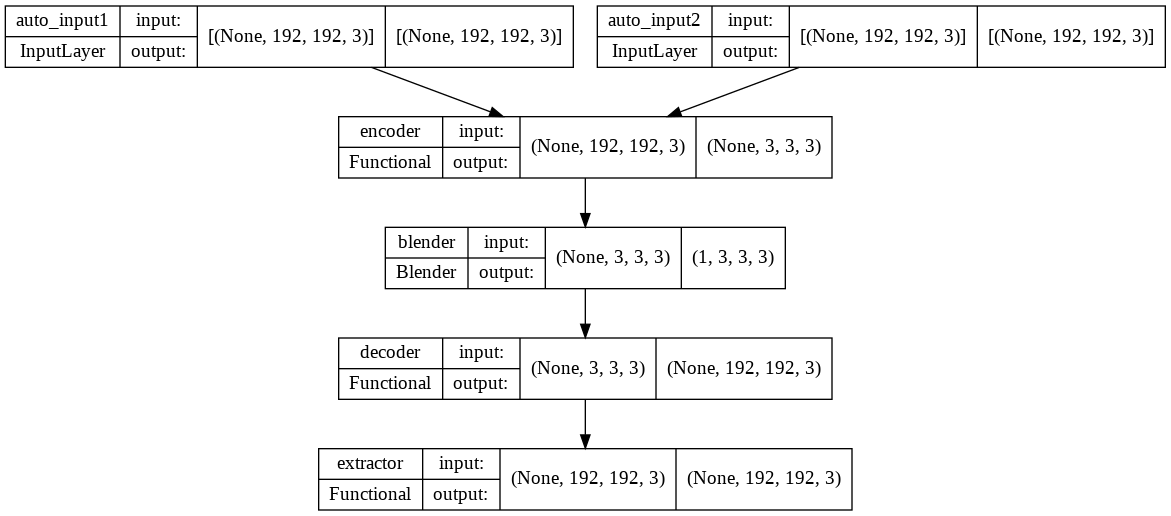

In [ ]:
keras.utils.plot_model(auto, "auto.png", show_shapes=True)

#**Compile the Model**

In [ ]:
optimizer=keras.optimizers.Adam(0.0001)

In [ ]:
# Get saved weights
opt_weights = np.load('/content/drive/MyDrive/PFE_final_100/last_test_100_image/optimier_weights_0_100epoch_7000.npy', allow_pickle=True)

grad_vars = auto.trainable_weights
# This need not be model.trainable_weightslearni; it must be a correctly-ordered list of
# grad_vars corresponding to how you usually call the optimizer.

In [ ]:
zero_grads = [tf.zeros_like(w) for w in grad_vars]

In [ ]:
# Apply gradients which don't do nothing with Adam
optimizer.apply_gradients(zip(zero_grads, grad_vars))

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

In [ ]:
# Set the weights of the optimizer
optimizer.set_weights(opt_weights)

In [ ]:
# NOW set the trainable weights of the model
auto.load_weights(filepath='/content/drive/MyDrive/PFE_final_100/last_test_100_image/auto_weights_0_100epoch_7000.h5')

In [ ]:
optimizer=keras.optimizers.Adam(0.0001)# adam optimier
loss_decoder = tf.keras.metrics.BinaryCrossentropy()# log loss pour le decoder
loss_extractor = tf.keras.metrics.BinaryCrossentropy()# log loss de extractor
#acc_metric =  tf.keras.metrics.BinaryAccuracy()
X_decod_loss=[]     # une list initier a 0 qui va contenir tt les loss de decoder durant "num_epochs"
X_extractor_loss=[] # une list initier a 0 qui va contenir tt les loss de extractor durant "num_epochs"

In [ ]:
num_epochs=7000 # nombre d iteration
batch_size=32 # c un mini batch Gradient Decent (32 images choisient  d une maniere aleatoir
# a chaque itération

#**Fit the Model**

In [ ]:
for epoch in range(num_epochs):
    subset = sample(list(x_train), batch_size)# dans la list x_train choisir 32 images aleatoir
    print(f"\nStart of Training Epoch {epoch+1}/{num_epochs}")
    i=0
    for batch_idx in subset:# parcourir les 32 images (subset) a chaque image le loss est calculer.
        i=i+1
        x=tf.expand_dims(batch_idx, axis=0)

        #hh.append(x[0])# ajouter une dimension a x_train[i] (192,192,3) ==> (1,192,192,3)
        y=tf.expand_dims(y_train[0], axis=0)# ajouter une dimension a y_train[0] (192,192,3) ==> (1,192,192,3)
        with tf.GradientTape() as tape: # stockage du gradient calculer dans la varriable tape
            y_pred = auto([x, y],[x,y])#calcule de y_pred apartir du model auto

            loss=tf.keras.metrics.binary_crossentropy(x, y_pred[0])+tf.keras.metrics.binary_crossentropy(y, y_pred[1])# application
        #du loss function est par la suite faire la somme des deux loss

            gradients = tape.gradient(loss, auto.trainable_weights)# calcule du gradient (la dérivé partiel pour chaque weight)
            optimizer.apply_gradients(zip(gradients, auto.trainable_weights))# application de gradient calculer atraver adam optimizer

            loss_decoder.update_state(x, y_pred[0])# mise a jour des  loss
            loss_extractor.update_state(y, y_pred[1])#mise a jour des  loss

  #i=i+batch_size

        #train_acc = acc_metric.result()

        train_decoder = loss_decoder.result()
        train_extractor = loss_extractor.result()
        print(f"%4d/%5d %2d/%2d Decoder_loss = %6.5f   Extractor_loss = %6.5f  " % (epoch+1,num_epochs,i,batch_size,train_decoder,train_extractor))


    X_decod_loss.append(train_decoder)# chargement des loss calculer dans chaque epoch
    X_extractor_loss.append(train_extractor)# chargement des loss calculer dans chaque epoch



Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
6853/ 7000 31/32 Decoder_loss = 0.47912   Extractor_loss = 0.10363  
6853/ 7000 32/32 Decoder_loss = 0.47912   Extractor_loss = 0.10363  

Start of Training Epoch 6854/7000
6854/ 7000  1/32 Decoder_loss = 0.47912   Extractor_loss = 0.10363  
6854/ 7000  2/32 Decoder_loss = 0.47912   Extractor_loss = 0.10363  
6854/ 7000  3/32 Decoder_loss = 0.47912   Extractor_loss = 0.10363  
6854/ 7000  4/32 Decoder_loss = 0.47912   Extractor_loss = 0.10363  
6854/ 7000  5/32 Decoder_loss = 0.47912   Extractor_loss = 0.10363  
6854/ 7000  6/32 Decoder_loss = 0.47912   Extractor_loss = 0.10363  
6854/ 7000  7/32 Decoder_loss = 0.47912   Extractor_loss = 0.10363  
6854/ 7000  8/32 Decoder_loss = 0.47912   Extractor_loss = 0.10363  
6854/ 7000  9/32 Decoder_loss = 0.47912   Extractor_loss = 0.10363  
6854/ 7000 10/32 Decoder_loss = 0.47912   Extractor_loss = 0.10363  
6854/ 7000 11/32 Decoder_loss = 0.47912   Extractor_loss = 

In [ ]:
k=optimizer.get_weights() # 0,52045,051153
kk=np.array(k,dtype=object)#0.51336

np.save('./optimier_weights_0_100epoch_7000', kk)

auto.save_weights('./auto_weights_0_100epoch_7000.h5', overwrite=True)

In [ ]:
with open("./extractor_loss1000.txt", "w") as f:
    for s in range(len(X_extractor_loss)):
        f.write(str(X_extractor_loss[s].numpy()) +"\n")

In [ ]:
with open("./decoder_loss1000.txt", "w") as f:
    for s in range(len(X_decod_loss)):
        f.write(str(X_decod_loss[s].numpy()) +"\n")

# **Imperceptibility**

**PSNR**

In [ ]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
                    # Therefore PSNR have no importance.
        return 100
    max_pixel = 1.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [ ]:
psnr_global_wm=[]
psnr_global_img=[]
for i in range(len(x_train)):
    x=tf.expand_dims(x_train[i], axis=0)
    y=tf.expand_dims(y_train[0], axis=0)
    f=auto.predict([x, y])
    psnr_img = PSNR(x_train[i], f[0])
    psnr_wm = PSNR(y_train[0], f[1])

    psnr_global_img.append(psnr_img)
    psnr_global_wm.append(psnr_wm)

In [ ]:
psnr_global_img = np.array(psnr_global_img)
print(np.argmax(psnr_global_img))
#print(f" MAX PSNR value is ==  {max_p} dB")
psnr_global_img[np.argmax(psnr_global_img)]#np.argmax:returns indices of the max element of the array in a particular axis.
psnrtest=psnr_global_img

60


In [ ]:
psnrtest = np.array(psnr_global_img[15:100])
print(np.argmax(psnrtest))
#print(f" MAX PSNR value is ==  {max_p} dB")
psnrtest[np.argmax(psnrtest)]

45


39.63714041768198

In [ ]:
sorted_index_array = np.argsort(psnr_global_img)
sorted_array = psnr_global_img[sorted_index_array]
rslt = sorted_array[-10 : ]
rslt

array([37.75960904, 37.81006471, 38.16000166, 38.30754767, 38.36002177,
       38.41043704, 38.54157522, 38.5933809 , 38.91071484, 39.63714042])

In [ ]:
psnr_global_img

array([36.22113934, 35.66814215, 33.36964231, 35.34805425, 37.47469199,
       36.65797856, 37.81006471, 34.72155647, 35.47687438, 35.91114413,
       31.4478071 , 33.46236475, 34.17720661, 34.82661437, 35.56423772,
       33.21870157, 35.63445496, 37.00640613, 33.62132715, 32.9281594 ,
       38.36002177, 34.57575702, 33.26720306, 38.41043704, 36.6865246 ,
       35.28108558, 38.91071484, 35.88558388, 33.18549796, 33.96804224,
       35.91530953, 33.97328534, 36.01196178, 33.59600965, 35.65383739,
       34.48682307, 34.34242994, 37.23025326, 35.44937812, 36.24303703,
       37.25640018, 36.95974664, 36.27673041, 34.69617804, 37.43036197,
       35.73350773, 35.06342175, 34.31559391, 35.25274633, 36.64981489,
       35.0347879 , 38.5933809 , 36.48719941, 33.43505058, 37.14971356,
       34.98746843, 37.60150052, 34.36291573, 33.5808668 , 34.47869694,
       39.63714042, 36.5641843 , 34.28921825, 37.66556024, 37.75960904,
       31.69930985, 31.74631945, 33.92509214, 34.02035424, 38.30

In [ ]:
len(psnr_global_wm)
psnr_global_wm = np.array(psnr_global_wm)
print(np.argmax(psnr_global_wm))
#print(f" MAX PSNR value is ==  {max_p} dB")
psnr_global_wm[np.argmax(psnr_global_wm)]

47


57.998004183922575

# **Result Visualisation**

In [ ]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

**Original Image**

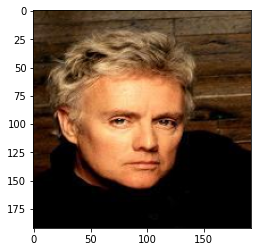

In [ ]:
#plt.style.use('')
plt.imshow(x_train[90])

In [ ]:
tf.keras.preprocessing.image.save_img("./56_originale.png",x_train[56])

**Watermarked Image**

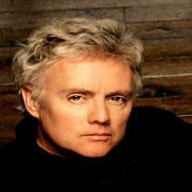

In [ ]:
x=tf.expand_dims(x_train[90], axis=0)
y=tf.expand_dims(y_train[0], axis=0)
f=auto.predict([x, y])
wtm_image=tensor_to_image(f[0])
wtm_image

In [ ]:
tf.keras.preprocessing.image.save_img("./56_wdi.png",wtm_image)

**Original Watermark**

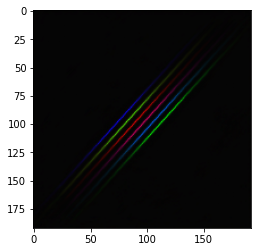

In [ ]:
plt.imshow(y_train[0])

**Extracted Watermark**

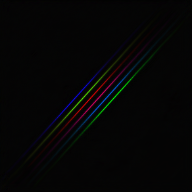

In [ ]:
wtm_extracted=tensor_to_image(f[1])
wtm_extracted

In [ ]:
tf.keras.preprocessing.image.save_img("./56_wte.png",wtm_extracted)

In [ ]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
                    # Therefore PSNR have no importance.
        return 100
    max_pixel = 1.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [ ]:
original_image=x_train[56]
watermarked_image=f[0]
value = PSNR(original_image, watermarked_image)
print(f"PSNR value of image is {value} dB")

PSNR value of image is 7.9131896905528265 dB


In [ ]:
original_watermark=y_train[0]
extracted_watermark=f[1]
value = PSNR(original_watermark, extracted_watermark)
print(f"PSNR value of watermark is {value} dB")

PSNR value of watermark is 56.80058116963145 dB


In [ ]:
data0=np.array(original_watermark)
data1=np.array(f[1])

In [ ]:
data2=np.array(original_image)
data3=np.array(f[0])
def norm_data(data):
    """
    normalize data to have mean=0 and standard_deviation=1
    """
    mean_data=np.mean(data)
    std_data=np.std(data, ddof=1)
    #return (data-mean_data)/(std_data*np.sqrt(data.size-1))
    return (data-mean_data)/(std_data)


**NCC**

In [ ]:
def ncc(data0, data1):
    """
    normalized cross-correlation coefficient between two data sets

    Parameters
    ----------
    data0, data1 :  numpy arrays of same size
    """
    return (1.0/(data0.size-1)) * np.sum(norm_data(data0)*norm_data(data1))

In [ ]:
print(f'ncc of wmed_image is   {ncc(data2,data3)}')
print(f'ncc of extracted watermark is  { ncc(data0,data1)}')

ncc of wmed_image is   0.1457960455077719
ncc of extracted watermark is  0.9993640700870777


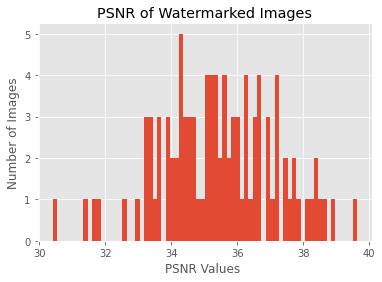

In [ ]:
#plt.plot(psnr_global_img)
plt.style.use('ggplot')
fig = plt.figure()
plt.hist(psnr_global_img, bins = 70)
plt.title('PSNR of Watermarked Images')
plt.xlabel("PSNR Values ")
plt.ylabel("Number of Images")
plt.show()
fig.savefig('./PSNR of Watermarked Images.png', dpi=300, bbox_inches='tight')

In [ ]:
deloss=[]
with open("/content/drive/MyDrive/PFE_final_100/last_test_100_image/decoder_loss1000.txt", "r") as f:
    deloss=f.readlines()
deloss1=[]
for i in deloss:
    deloss1.append(float(i))

In [ ]:
extractloss=[]
with open("/content/drive/MyDrive/PFE_final_100/last_test_100_image/extractor_loss1000.txt", "r") as f:
    extractloss=f.readlines()
extractloss1=[]
for i in deloss:
    extractloss1.append(float(i))

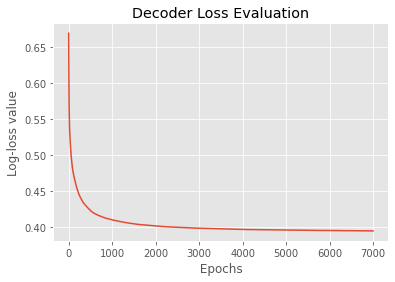

In [ ]:
plt.style.use('ggplot')
fig = plt.figure()
plt.plot(deloss1)
plt.title('Decoder Loss Evaluation')
plt.xlabel(" Epochs ")
plt.ylabel("Log-loss value")
plt.show()
fig.savefig('./Decoder Loss Evaluation.png', dpi=300, bbox_inches='tight')

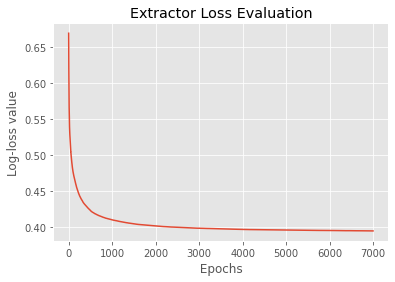

In [ ]:
plt.style.use('ggplot')
fig = plt.figure()
plt.plot(extractloss1)
plt.title('Extractor Loss Evaluation')
plt.xlabel(" Epochs ")
plt.ylabel("Log-loss value")
plt.show()
fig.savefig('./Extractor Loss Evaluation.png', dpi=300, bbox_inches='tight')

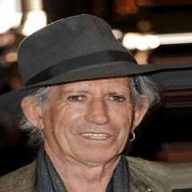

In [ ]:
x=tf.expand_dims(x_train[50], axis=0)
y=tf.expand_dims(y_train[0], axis=0)
f=auto.predict([x, y])
wtm_image=tensor_to_image(f[0])
wtm_image